In [2]:
# In this exercise we'll examine a learner which has high variance, and tries to learn
# nonexistant patterns in the data.
# Use the learning curve function from sklearn.learning_curve to plot learning curves
# of both training and testing error.
# CODE YOU HAVE TO TYPE IN IS IN LINE 35

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
# PLEASE NOTE:
# In sklearn 0.18, the import would be from sklearn.model_selection import learning_curve
#from sklearn.learning_curve import learning_curve # sklearn version 0.17
from sklearn.model_selection import learning_curve
from sklearn.cross_validation import KFold
from sklearn.metrics import explained_variance_score, make_scorer
import numpy as np

# Set the learning curve parameters; you'll need this for learning_curves
size = 1000
cv = KFold(size,shuffle=True)
score = make_scorer(explained_variance_score)

# Create a series of data that forces a learner to have high variance
X = np.round(np.reshape(np.random.normal(scale=5,size=2*size),(-1,2)),2)
y = np.array([[np.sin(x[0]+np.sin(x[1]))] for x in X])

def plot_curve():
    # Defining our regression algorithm
    reg = DecisionTreeRegressor()
    # Fit our model using X and y
    reg.fit(X,y)
    print "Regressor score: {:.4f}".format(reg.score(X,y))
    
    # TODO: Use learning_curve imported above to create learning curves for both the
    #       training data and testing data. You'll need reg, X, y, cv and score from above.
    
    train_sizes, train_scores, test_scores = learning_curve(reg,X,y,cv=cv,scoring=score)
    
    # Taking the mean of the test and training scores
    train_scores_mean = np.mean(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores,axis=1)
    
    # Plotting the training curves and the testing curves using train_scores_mean and test_scores_mean 
    plt.plot(train_sizes ,train_scores_mean,'-o',color='b',label="train_scores_mean")
    plt.plot(train_sizes,test_scores_mean ,'-o',color='r',label="test_scores_mean")
    
    # Plot aesthetics
    plt.ylim(-0.1, 1.1)
    plt.ylabel("Curve Score")
    plt.xlabel("Training Points")
    plt.legend(bbox_to_anchor=(1.1, 1.1))
    plt.show()

Regressor score: 1.0000


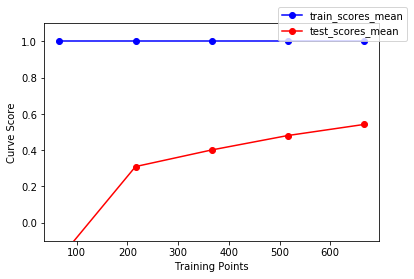

In [3]:
def main():
    plot_curve()

if __name__ == "__main__":
    main()